## [Lecture 12.2: MLP Classifier on MNIST dataset](https://www.youtube.com/watch?v=lvS2ZHJeyng)
In this notebook we will demonstrate working of `MLPClassifier` to classify handwritten digits in `MNIST` dataset

### **Imports**
- We will begin by importing basic python libraries like `numpy` and `pandas`
- `matplotlib.pyplot` and `seaborn` for plotting
- The `MNIST` dataset can be downloaded using `fetch_openml` library
- The `MLPClassifier` is imported from `sklearn.neural_network` module
- The model training and evaluation is performed with cross validation using a bunch of model selection utilities like `cross_val_score`, `train_test_split`, `StratifiedShuffleSplit` etc.
- The performance on the test samples is obtained via `accuracy_score`, `confusion_matrix` and `classification_report`.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [2]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

### **Load Dataset**
Let us use the MNIST Dataset for the demo of MLPClassifier

In [3]:
# Load dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [6]:
print('Shape of training data after flattening', X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


In [7]:
print('Shape of training data', X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels', y_test.shape)

Shape of training data (60000, 784)
Shape of training labels (60000,)
Shape of testing data (10000, 784)
Shape of testing labels (10000,)


### **Fit MLPClassifier on MNIST dataset**
Let us train a MLP Classifier with one hidden layer having 128 neurons

In [8]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [9]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv=cv)
print('Trainig accuracy: {:.2f} %'.format(cv_score.mean()*100))

Trainig accuracy: 97.70 %


In [10]:
# Prediction probabilities of test data
mlpc.predict_proba(X_test[:5])

array([[1.49041034e-13, 3.40544824e-13, 6.15559339e-11, 4.00406757e-07,
        9.47267677e-20, 2.69762065e-14, 1.10383306e-18, 9.99999599e-01,
        2.02954007e-11, 3.80159988e-11],
       [3.05412122e-19, 3.27192442e-12, 9.99999998e-01, 1.95414988e-09,
        1.21773160e-39, 3.05084807e-14, 9.60873890e-16, 1.38135195e-27,
        1.61622354e-11, 2.67589529e-24],
       [1.19186324e-12, 9.99938426e-01, 5.12150706e-07, 2.28272684e-09,
        9.78399176e-08, 1.09695014e-08, 1.56137321e-08, 1.17789497e-07,
        6.08174788e-05, 4.26781424e-11],
       [1.00000000e+00, 1.02060802e-20, 2.22513341e-14, 1.56818466e-19,
        6.53134413e-21, 1.89268979e-16, 8.17636992e-11, 2.86141337e-11,
        6.79971931e-21, 4.99022931e-15],
       [2.82759660e-13, 6.49530773e-16, 1.26284418e-11, 2.07919785e-17,
        9.99993884e-01, 2.89722194e-16, 3.74580195e-12, 1.01236414e-10,
        4.28948777e-12, 6.11602479e-06]])

In [11]:
y_pred = mlpc.predict(X_test)

In [12]:
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, mlpc.predict(X_train))*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Training accuracy: 100.00%
Testing accuracy: 98.00%


### **Confusion matrix plot**

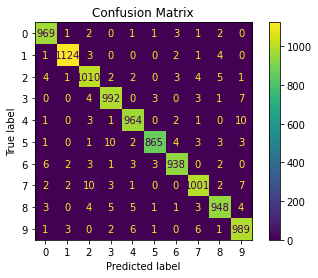

In [13]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [14]:
print('Classification Report \n')
print(classification_report(y_test, y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Plot of test data along with predicted class labels

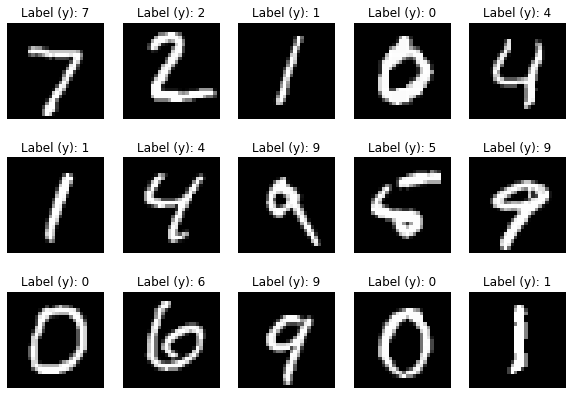

In [17]:
# Plotting some test samples and their predicted labels
fig = plt.figure(figsize=(10, 7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

### **Visualization of multi-layer perceptron weights in hidden layer**
- Looking at the learned coefficients of a neural network can provide insight into the learning behaviour
- The input data consists 784 features in the dataset.
- We have used one hidden layer with 128 neurons. Therefore weight matrix has the shape (784, 128)
- We can therefore visualize a single column of the weight matrix as a 28 x 28 pixel image

In [18]:
w = mlpc.coefs_
w = np.array(w[0])
w.shape

(784, 128)

In [19]:
w1 = np.array(w[:, 0])
w1.shape

(784,)

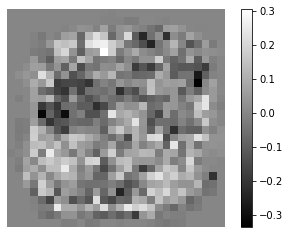

In [20]:
w_matrix = w1.reshape(28, 28)
fig = plt.figure()
plt.imshow(w_matrix, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

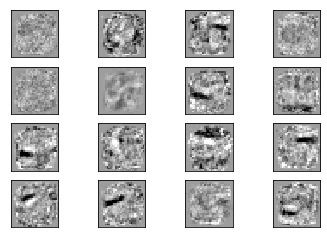

In [21]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Text(0.5, 1.0, 'Loss curve')

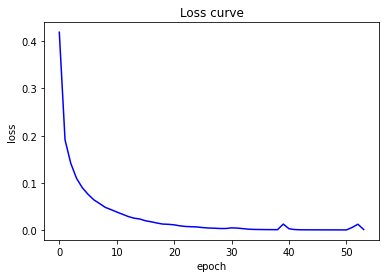

In [22]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

### [Lecture 12.3: MLP Regressor on California Housing Dataset](https://www.youtube.com/watch?v=zsPNGpLFqgg)


### **MLP Regressor**
MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer.

Therefore, it uses the square error as the loss function, and the output is a set of continuous values

### **Import Basic Libraries**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit

In [25]:
np.random.seed(42)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

### **Load Dataset**
Let us use the California Housing Dataset for the demo of MLPRegressor

In [26]:
# Load Dataset
dataset = sklearn.datasets.fetch_california_housing()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
print('Shape of training dataset', X_train.shape)
print('Shape of testing dataset', X_test.shape)

Shape of training dataset (16512, 8)
Shape of testing dataset (4128, 8)


### **Fit a pipeline to implement MLPRegressor on California Housing Dataset**
Let us train a MLP Regressor with three hidden layers each with 32 neurons.

In [28]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', MLPRegressor(hidden_layer_sizes=(32, 32, 32)))])

cv_results = cross_validate(pipe,
                            X_train,
                            y_train,
                            cv=cv,
                            scoring='neg_mean_absolute_percentage_error',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=2)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f'Mean Absolute percentage error of MLP Regressor on training set: \n'
      f'{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}')
print(f'Mean Absolute percentage error of MLP Regressor on testing set: \n'
      f'{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}')

Mean Absolute percentage error of MLP Regressor on training set: 
0.186 +/- 0.012
Mean Absolute percentage error of MLP Regressor on testing set: 
0.198 +/- 0.015


In [29]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=(32, 32, 32)))])

In [30]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.1688530677578464

In [31]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.19246846039639723

Text(0, 0.5, 'predicted')

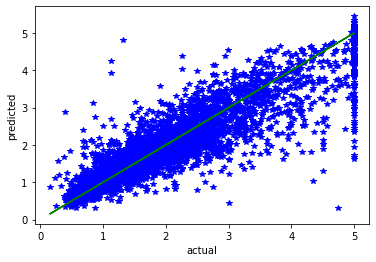

In [33]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')